Name: Syed Mohamad Tawseeq          
ROll: 22CH10090

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = models.resnet18(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 179MB/s] 


In [2]:
for param in resnet18.parameters(): #we will reeze all parameters
    param.requires_grad = False

resnet18.fc = nn.Linear(resnet18.fc.in_features, 10) # replace final layer for CIFAR-10,10 classes
resnet18 = resnet18.to(device)


In [ ]:
transform = transforms.Compose([ # transform is defined first and then is passed as an argument   while loading the dataset
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])
train_dataset = datasets.CIFAR10(     #loading dataset as by default documentation on pytorch website
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader( #dataoader coverts the dataset into pytorch tensorr format
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=2
)


100%|██████████| 170M/170M [00:10<00:00, 16.6MB/s] 


In [ ]:
#train loop copied from sec2.ipynb 
# things have been explained in that notebook
def training_loop(model, device, train_loader, test_loader, epochs= 10): 
  train_losses = []
  train_accs = []
  test_accs = []

  print(f"Device = {device}")
  for epoch in range(epochs):
      model.train()
      correct, total, running_loss = 0, 0, 0.0
      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          _, predicted = outputs.max(1)
          total += labels.size(0)
          correct += predicted.eq(labels).sum().item()
          
      loss = running_loss / len(train_loader)
      train_acc = 100 * correct / total

      model.eval()
      correct, total = 0, 0

      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model(images)
              _, predicted = outputs.max(1)
              total += labels.size(0)
              correct += predicted.eq(labels).sum().item()

      test_acc = 100 * correct / total

      train_losses.append(loss)
      train_accs.append(train_acc)
      test_accs.append(test_acc)

      print(f"Epoch numb[{epoch+1}/{epochs}] Loss: {loss}, Train Accuracy: {train_acc}%, Test Accuracy : {test_acc}%")
  return train_losses, train_accs, test_accs

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.fc.parameters(), lr=0.001) #adam optim

epochs = 5

train_loss_resnet, train_acc_resnet, test_acc_resnet = training_loop( #call the function
    resnet18,
    device,
    train_loader,
    test_loader,
    epochs=epochs
)

Device = cuda
Epoch numb[1/5] Loss: 1.72967025081215, Train Accuracy: 39.32%, Test Accuracy : 44.54%
Epoch numb[2/5] Loss: 1.5999499637147654, Train Accuracy: 44.074%, Test Accuracy : 44.6%
Epoch numb[3/5] Loss: 1.583027073336989, Train Accuracy: 44.956%, Test Accuracy : 44.98%
Epoch numb[4/5] Loss: 1.579517517553266, Train Accuracy: 45.226%, Test Accuracy : 44.77%
Epoch numb[5/5] Loss: 1.5730267273800453, Train Accuracy: 45.194%, Test Accuracy : 45.31%


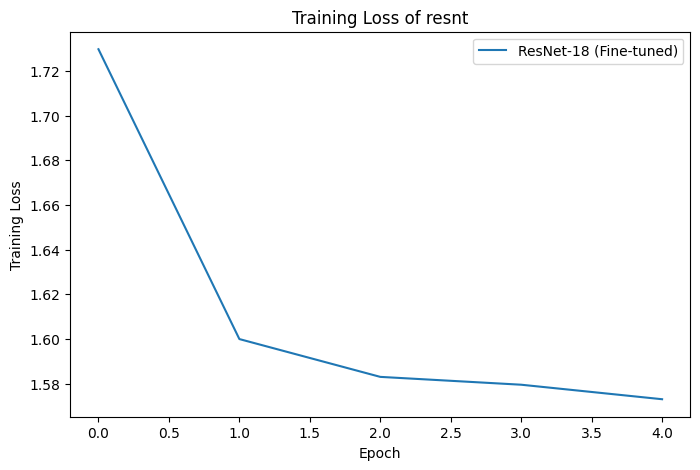

In [8]:
plt.figure(figsize=(8,5))
plt.plot(train_loss_resnet, label="ResNet-18 (Fine-tuned)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss of resnt")
plt.legend()
plt.show()


Best CNN Has training loss = 0.81404, this resnet has = 1.573026727380045                                                           
Best CNN has test accuracy =  65.07, this resnet has = 45.31%